# 2D Neural Style Transfer

This is the Jupyter Notebook for 2D NST.

## Step 0: imports

In [1]:
import sys
import torch
import matplotlib.pyplot as plt

# install KeOps kernels
!pip install -q pykeops==1.4.1 # > install.log

# install pytorch version of np.Interp, which is used for histogram loss
!pip install -q git+https://github.com/aliutkus/torchinterp1d.git

# Please run the following two lines DEPENDENTLY! (depends on whether the notebook is run locally or on Colab)
!git clone https://github.com/wmd0701/MA.git NST
%cd NST

# import self-defined functions
from utils.data_loader import image_loader, image_unloader
from utils.pipeline import pipeline_2D_NST_OpsOnBNST
from utils.plot import plot_statistics, plot_spectrum

# better plot
%pylab inline

     |████████████████████████████████| 319 kB 5.9 MB/s 
Cloning into 'NST'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 113 (delta 37), reused 88 (delta 14), pack-reused 0
Receiving objects: 100% (113/113), 12.12 MiB | 2.39 MiB/s, done.
Resolving deltas: 100% (37/37), done.
/content/NST


Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Populating the interactive namespace from numpy and matplotlib


## Step 1: set up configs

In [27]:
# common settings for all configs
style_layers = ['conv1_1', 'conv3_1', 'conv4_1']
style_weights = [1e6/n**2 for n in [64,256,512]]
model_pooling = 'max'
n_iters = 200
learning_rate = 1

# configs
configs = [# config 0
           {'image_path':'starry_night.jpg', 'imsize':256, 'tiling':1, 'indices':None,
            'mean_coef':1, 'mean_bias':0, 'mean_freq_lower':None, 'mean_freq_upper':None,
            'std_coef':1, 'std_bias':0, 'std_freq_lower':None, 'std_freq_upper':None
            },
           
           # config 1
           {'image_path':'starry_night.jpg', 'imsize':256, 'tiling':1, 'indices':None,
            'mean_coef':1, 'mean_bias':0, 'mean_freq_lower':None, 'mean_freq_upper':None,
            'std_coef':1, 'std_bias':0, 
            'std_freq_lower':[None,None,1e-10], 
            'std_freq_upper':None,
            },
           
           # config 2
           {'image_path':'starry_night.jpg', 'imsize':256, 'tiling':1, 'indices':None,
            'mean_coef':1, 'mean_bias':0, 'mean_freq_lower':None, 'mean_freq_upper':None,
            'std_coef':1, 'std_bias':0, 
            'std_freq_lower':None, 
            'std_freq_upper':[None,None,1e-10],
            },
           
           ]

## Step 2: run NST pipeline

In [28]:
# lists of BN means / stds and output images
means = {config_idx : {} for config_idx in range(len(configs))}
stds  = {config_idx : {} for config_idx in range(len(configs))}
output_imgs = []

config_idx = 0
for config in configs:
    # read params from config
    image_path = config.get('image_path', 'starry_night.jpg')
    imsize = config.get('imsize', None)
    tiling = config.get('tiling', 1)
    indices = config.get('indices', None)
    mean_coef = config.get('mean_coef', 1)
    mean_bias = config.get('mean_bias', 0)
    mean_freq_lower = config.get('mean_freq_lower', None)
    mean_freq_upper = config.get('mean_freq_upper', None)
    std_coef = config.get('std_coef', 1)
    std_bias = config.get('std_bias', 0)
    std_freq_lower = config.get('std_freq_lower', None)
    std_freq_upper = config.get('std_freq_upper', None)
 
    # images
    style_img = image_loader("./image_style/"+image_path, imsize=imsize, tiling=tiling)
    input_img = torch.rand((1,3,256,256), device=style_img.device)

    output_img, loss_history, style_losses = pipeline_2D_NST_OpsOnBNST( style_img = style_img, 
                                                                        input_img = input_img,
                                                                        n_iters = n_iters,
                                                                        style_weights = style_weights,
                                                                        style_layers = style_layers,
                                                                        learning_rate = learning_rate,
                                                                        model_pooling = model_pooling,
                                                                        silent = True,
                                                                        indices = indices,
                                                                        mean_coef=mean_coef, mean_bias=mean_bias, mean_freq_lower=mean_freq_lower, mean_freq_upper=mean_freq_upper,
                                                                        std_coef=std_coef, std_bias=std_bias, std_freq_lower=std_freq_lower, std_freq_upper=std_freq_upper
                                                                        )

    # add output image
    output_imgs.append(image_unloader(output_img))                          

    # add statistics
    for style_layer_idx in range(len(style_layers)):
        style_layer_str = style_layers[style_layer_idx]
        means[config_idx][style_layer_str] = style_losses[style_layer_idx].target_mean.detach().cpu()
        stds[config_idx] [style_layer_str] = style_losses[style_layer_idx].target_std.detach().cpu()
    
    config_idx += 1

run [20]:
run [40]:
run [60]:
run [80]:
run [100]:
run [120]:
run [140]:
run [160]:
run [180]:
run [200]:
run [220]:
run [20]:
run [40]:
run [60]:
run [80]:
run [100]:
run [120]:
run [140]:
run [160]:
run [180]:
run [200]:
run [220]:
run [20]:
run [40]:
run [60]:
run [80]:
run [100]:
run [120]:
run [140]:
run [160]:
run [180]:
run [200]:
run [220]:


## Step 3: plots

### Plot style reconstructions

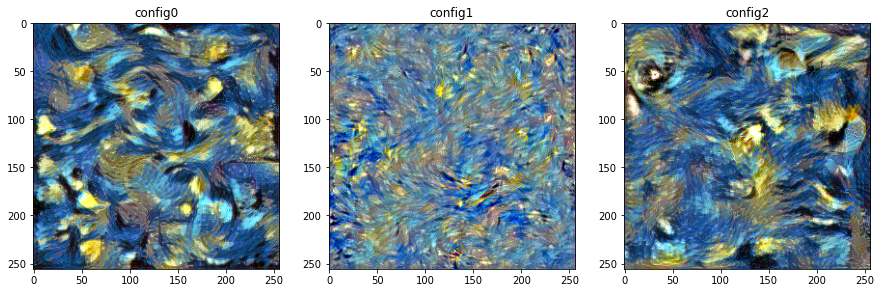

In [29]:
plt.figure(figsize=(5*len(output_imgs), 5))
for i in range(len(output_imgs)):
    plt.subplot(1, len(output_imgs), i+1)
    plt.imshow(output_imgs[i])
    plt.title('config' + str(i))

### Plot BN mean / std

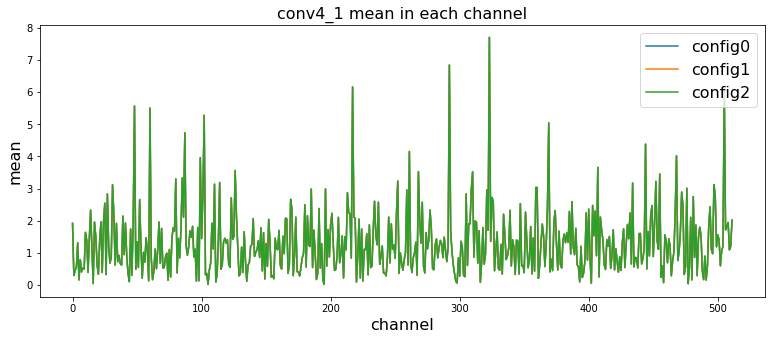

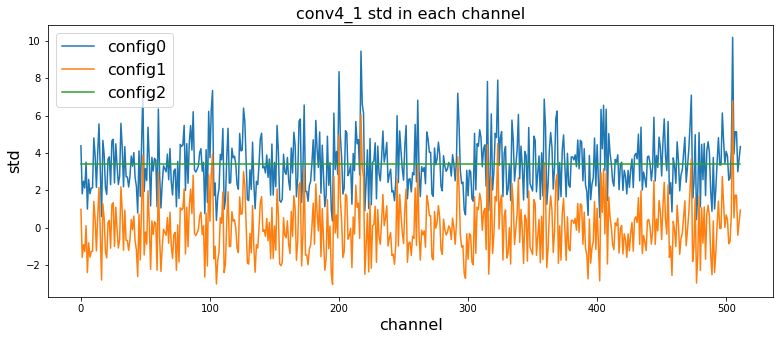

In [6]:
plot_statistics(means, config_idx = None, style_layer = 'conv4_1', title = 'mean')
plot_statistics(stds,  config_idx = None, style_layer = 'conv4_1', title = 'std')

### Plot spectrums

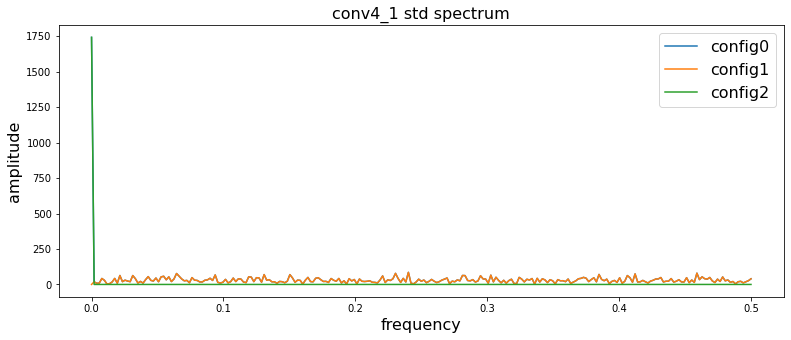

In [30]:
plot_spectrum(stds,  config_idx = None, style_layer = 'conv4_1', title = 'std')